## PHASE ONE PROJECT: Analysis of Movie Performance Over Time

# Introduction
In the realm of entertainment innovation, Microsoft is on the verge of establishing a pioneering movie studio. As the designated analyst for this pivotal initiative, the goal is to decipher the intricate dynamics of successful contemporary films. Armed with comprehensive data encompassing movie titles, revenue metrics, studio affiliations, runtimes, genres, and audience ratings, the analysis aims to distill actionable insights. These findings will serve as a strategic compass, empowering Microsoft's movie studio to produce content that resonates with audiences and maximizes box office success. This exploration is a proactive step towards seamlessly integrating Microsoft into the dynamic realm of original content creation.
# Explain the real-world problem the project aims to solve.
This project addresses Microsoft's entry into original content creation within the film industry, focusing on establishing a successful movie studio. The real-world problem involves deciphering the key factors contributing to the success of contemporary films. By analyzing data on movie titles, revenue metrics, studio affiliations, runtimes, genres, and audience ratings, the goal is to provide actionable insights. The project aims to empower Microsoft with strategic knowledge, enabling informed decisions and a distinctive presence in the dynamic realm of original content creation.
# Identify stakeholders and how they would use the project.
Stakeholders in this project include Microsoft executives, creative teams involved in film production, and marketing teams tasked with promoting the studio's content. Microsoft executives would leverage the project to make informed decisions on the types of films to produce, aligning with market trends. Creative teams would utilize the insights to tailor their film concepts to genres and characteristics that resonate with audiences, increasing the likelihood of success. Marketing teams would benefit by understanding the preferences and trends that drive box office success, allowing them to develop targeted promotional strategies for the studio's films.




# Explaining the data set 
The dataset for this analysis comprises two key sources. The first is a CSV file containing information on movie titles, domestic gross, foreign gross, studio affiliations, and release years. This dataset offers insights into the financial performance and distribution of films over time. The second source is an SQL database providing details on movie runtimes, genres, average ratings, and the number of votes received. This database enriches the analysis with information about the content and audience reception of the films. The combined dataset equips us with a comprehensive view of both the financial and qualitative aspects of movie production, facilitating a holistic exploration of the factors influencing box office success.

# Importing the data sets and the relevant libraries
This ensures that we have the data needed to perform the analysis, as well as the necessary libraries that will aid in performing the mentioned analyses. 

In [136]:
#import the necessary libraries
import csv
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

## Data Analysis per Data Set
The data sets will be analysed in three steps:
1. Individual Analysis of the CSV file
2. Individual Analysis of the SQL Database
3. Joint Analysis of the data sets. 
The purpose of this approach is to ensure that inferences are drawn from the various data sets independently as well as when they are joined. 

## 1. Individual Analysis of the CSV file

### 1.1 Loadng the Data Set

In [137]:
# Create the needed file path
file_path = './bom.movie_gross.csv'
#Read it into a pandas dataframe
df =pd.read_csv(file_path)
#show the results of the top ten in the list 
print(df.head(10))

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   
5                   The Twilight Saga: Eclipse   Sum.     300500000.0   
6                                   Iron Man 2   Par.     312400000.0   
7                                      Tangled     BV     200800000.0   
8                                Despicable Me   Uni.     251500000.0   
9                     How to Train Your Dragon   P/DW     217600000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
5     398000000  2010  
6     311500000  2010  
7   

### 1.2 Cleaning the Data Set
#### 1.2.1 We will start by dropping the rows that haver missing values for the domestic gross or the foreign gross columns. This ensures that we deleted al the null values, hence giving us a clean data set to work with.

In [138]:
#Drop rows with missing values in the 'domestic gross' and 'foreign gross' features
df.dropna(subset=['domestic_gross', 'foreign_gross'], inplace=True)

# Display the DataFrame after dropping rows
print(df[['title', 'domestic_gross', 'foreign_gross']])

                                                  title  domestic_gross  \
0                                           Toy Story 3     415000000.0   
1                            Alice in Wonderland (2010)     334200000.0   
2           Harry Potter and the Deathly Hallows Part 1     296000000.0   
3                                             Inception     292600000.0   
4                                   Shrek Forever After     238700000.0   
...                                                 ...             ...   
3275                                    I Still See You          1400.0   
3286                              The Catcher Was a Spy        725000.0   
3309                                         Time Freak         10000.0   
3342  Reign of Judges: Title of Liberty - Concept Short         93200.0   
3353            Antonio Lopez 1970: Sex Fashion & Disco         43200.0   

     foreign_gross  
0        652000000  
1        691300000  
2        664300000  
3        535700

#### 1.2.2 Let's check if there are any other columns that have null values

In [139]:
# Check for null values in the DataFrame
null_values = df.isnull().sum()

# Display the count of null values for each column
print("These are the Null Values in the CSV Data:")
print(null_values)

These are the Null Values in the CSV Data:
title             0
studio            2
domestic_gross    0
foreign_gross     0
year              0
dtype: int64


#### 1.2.3 Let's delete the null values in the studio column as shown in the output above

In [140]:
#Drop rows with missing values in the 'studio' features
df.dropna(subset=['studio'], inplace=True)
#save the cleaned data under a new variable name for reference
cleaned_data = df
# Display the DataFrame after dropping rows
print(cleaned_data)
#print(df[['title', 'domestic_gross', 'foreign_gross', 'studio']])

                                                  title        studio  \
0                                           Toy Story 3            BV   
1                            Alice in Wonderland (2010)            BV   
2           Harry Potter and the Deathly Hallows Part 1            WB   
3                                             Inception            WB   
4                                   Shrek Forever After          P/DW   
...                                                 ...           ...   
3275                                    I Still See You           LGF   
3286                              The Catcher Was a Spy           IFC   
3309                                         Time Freak    Grindstone   
3342  Reign of Judges: Title of Liberty - Concept Short  Darin Southa   
3353            Antonio Lopez 1970: Sex Fashion & Disco            FM   

      domestic_gross foreign_gross  year  
0        415000000.0     652000000  2010  
1        334200000.0     691300000  2

#### 1.2.4 Let's see the data types, and make necessary adjustments where necessary. We ideally want the Title and Studio to be Objects, domestic gross and foreign gross to be integers or floats, and year to be am integer. If that's the case, then the data is in a good shape for us to manipulate. 

In [141]:

 #Display data types of each column
print("Data Types of Each Column:")
print(cleaned_data.dtypes)

Data Types of Each Column:
title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object


#### 1.2.5 Let's check whether there are duplicates in the data set, and delete the duplicates if any.

In [142]:
#Check for duplicates
df.duplicated().value_counts()

False    2007
Name: count, dtype: int64

### 1.3 Data Analysis and Visualization
Now that we have cleaned the data we can now do the analysis

#### 1.3.1 Let's find the top ten studios based on total gross for the period of time. This forms part of competitor analysis and we can also use this data later when we want to highlight specific details about the top studios.

In [143]:
!pip install tabulate

In [144]:
 
# Create a new column 'total_gross' representing the sum of domestic and foreign gross
cleaned_data['total_gross'] =  pd.to_numeric(cleaned_data['domestic_gross'], errors='coerce') + pd.to_numeric(cleaned_data['foreign_gross'], errors='coerce')

# Group by studio and calculate the total gross for each
studio_total_gross = cleaned_data.groupby('studio')['total_gross'].sum()

# Get the top ten studios
top_ten_studios = studio_total_gross.nlargest(10)
pd.options.display.float_format = None
# Print the list of top ten studios based on total gross

print("Top Ten Studios Based on Total Gross:")
print(top_ten_studios.reset_index().to_markdown(index=False, headers=["Studio", "Total Gross"]))


Top Ten Studios Based on Total Gross:
| Studio   |   Total Gross |
|:---------|--------------:|
| BV       |   4.25749e+10 |
| Fox      |   3.09804e+10 |
| WB       |   3.07915e+10 |
| Uni.     |   2.85155e+10 |
| Sony     |   2.24047e+10 |
| Par.     |   1.94442e+10 |
| WB (NL)  |   1.03141e+10 |
| LGF      |   8.46747e+09 |
| LG/S     |   5.31892e+09 |
| P/DW     |   5.0765e+09  |


#### 1.3.2 Below is the graph showing the top ten studios based on total gross.

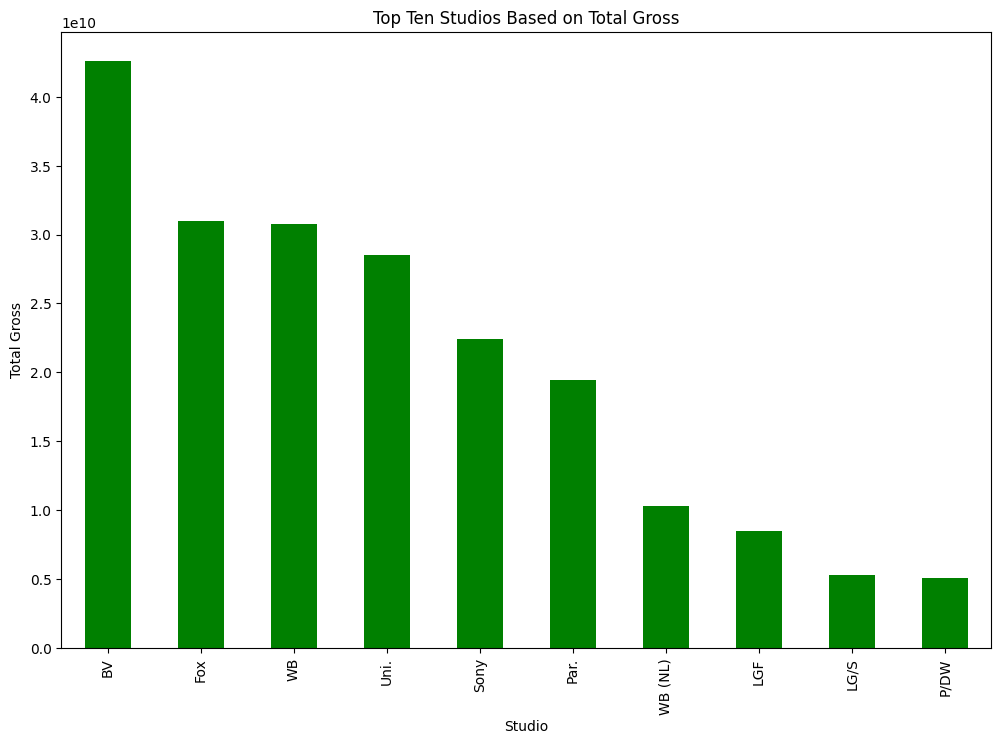

In [145]:
# Plotting a bar chart for the top ten studios
plt.figure(figsize=(12, 8))
top_ten_studios.sort_values(ascending=False).plot(kind='bar', color='green')
#Name the axes
plt.title('Top Ten Studios Based on Total Gross')
plt.xlabel('Studio')
plt.ylabel('Total Gross')
#Show the graph
plt.show()

#### 1.3.3 Le't find the top movies based on the total gross over the time period. 

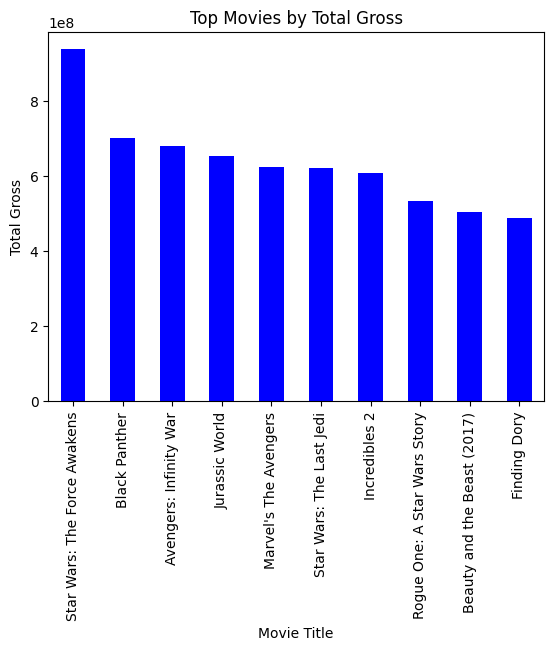

In [146]:
# Top movies by total gross
top_movies = df.groupby('title')['domestic_gross'].sum().sort_values(ascending=False).head(10)

# Plotting
top_movies.plot(kind='bar', color='blue')
plt.title('Top Movies by Total Gross')
plt.xlabel('Movie Title')
plt.ylabel('Total Gross')
plt.show()

#### 1.3.4 Next step is to find the Average Domestic Gross by Studio

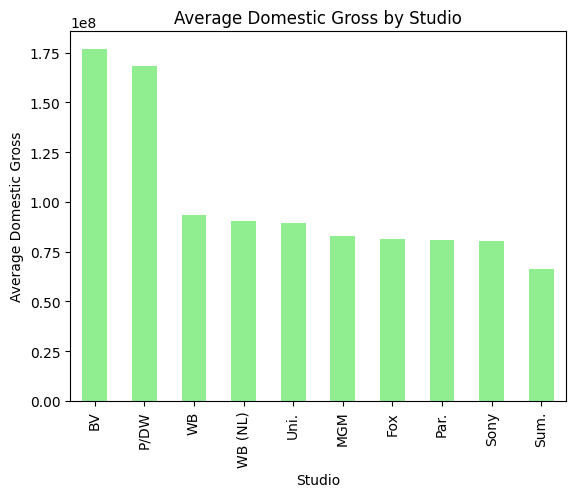

In [147]:
# Average domestic gross by studio
studio_avg_gross = df.groupby('studio')['domestic_gross'].mean().sort_values(ascending=False).head(10)

# Plotting
studio_avg_gross.plot(kind='bar', color='lightgreen')
plt.title('Average Domestic Gross by Studio')
plt.xlabel('Studio')
plt.ylabel('Average Domestic Gross')
plt.show()

#### 1.3.5 Let's visualize the number of releases by the studios to see how they performed

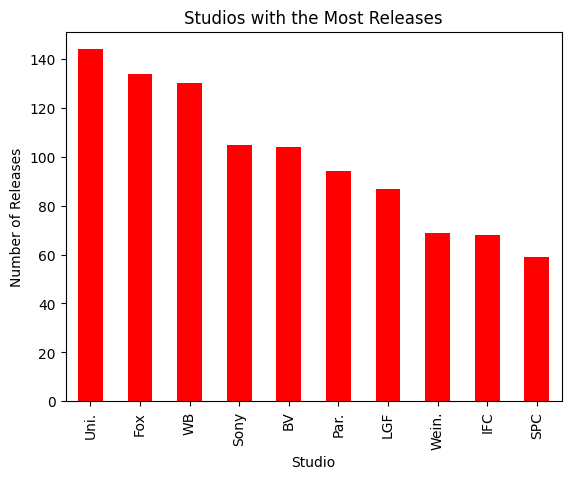

In [148]:
# Number of releases by studio
studio_movie_count = df['studio'].value_counts().head(10)

# Plotting
studio_movie_count.plot(kind='bar', color='red')
plt.title('Studios with the Most Releases')
plt.xlabel('Studio')
plt.ylabel('Number of Releases')
plt.show()


#### 1.3.6 Let's do a comparison of the domestic and foreign gross over time.

domestic_gross    float64
foreign_gross      object
dtype: object


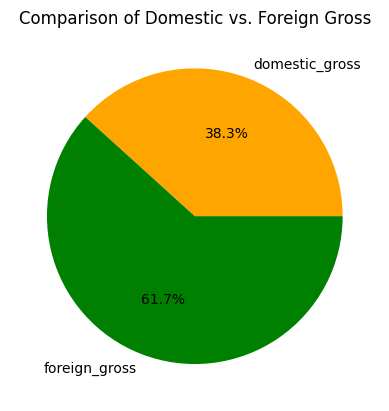

In [149]:
import matplotlib.pyplot as plt

# Check data types of 'domestic_gross' and 'foreign_gross' columns
print(df[['domestic_gross', 'foreign_gross']].dtypes)

# Convert columns to numeric if needed
df['domestic_gross'] = pd.to_numeric(df['domestic_gross'], errors='coerce')
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')

# Total domestic vs. foreign gross
total_gross_comparison = df[['domestic_gross', 'foreign_gross']].sum()

# Plotting
total_gross_comparison.plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'green'])
plt.title('Comparison of Domestic vs. Foreign Gross')
plt.show()


### 1.4 Inferences that can be drawn from the above analysis 
#### 1.4.1 Below are the top insights that we can get from this data. 
- Over the years, the foreign gross is greater than the domestic gross. Meaning that there Microsoft should be aware of the bigger market that exists outside the country. 
- The top performing studios also produced a high number of movies. 
#### 1.4.2 How can this data be useful? 
- Microsoft can have a clear idea of who the key competitors are as the company plans to start a studio. 
- Microsoft should be cognizant of the huger foreign market, and therefore make movies that appeal to a larger audience. 
- As the top Studios are also doing this, Microsoft should have a budget to produce several movies over the years.

## 2. Individual Analysis of the SQL Database

### 2.1 Loading the Database

The next step is to load the SQL data base and then work with it. The data base has several tables, from which we can get columns of data. These data sets will be used to create visualization and to drawm inferences that the CEO can use. 

#### 2.1.1 Let's start by verifying the tables available in the database

In [150]:
# Connect to the SQLite database
conn = sqlite3.connect('im.db')

# Create a cursor object to interact with the database
cursor = conn.cursor()

# Execute a query to fetch all tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all table names
tables = cursor.fetchall()

# Print the table names
for table in tables:
    print(table[0])


movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers
bom


#### 2.1.2 Since we are more interested in the movie_basics and the movie_ratings tables, we can have a look at those to see what they contain 

In [151]:
# Review data in "movie_ratings"
ratings_data_query = """
SELECT *
FROM movie_ratings;
"""

ratings_data = pd.read_sql(ratings_data_query, conn)
print(ratings_data.head(100))


      movie_id  averagerating  numvotes
0   tt10356526            8.3        31
1   tt10384606            8.9       559
2    tt1042974            6.4        20
3    tt1043726            4.2     50352
4    tt1060240            6.5        21
..         ...            ...       ...
95   tt1515069            8.3        15
96   tt1515208            6.3      1447
97   tt1516577            5.3       147
98   tt1516595            4.4        64
99   tt1517225            7.4      2189

[100 rows x 3 columns]


In [152]:
# Review data in "movie_basics"
ratings_data_query = """
SELECT *
FROM movie_basics;
"""

ratings_data = pd.read_sql(ratings_data_query, conn)
print(ratings_data.head(100))


     movie_id                          primary_title  \
0   tt0063540                              Sunghursh   
1   tt0066787        One Day Before the Rainy Season   
2   tt0069049             The Other Side of the Wind   
3   tt0069204                        Sabse Bada Sukh   
4   tt0100275               The Wandering Soap Opera   
..        ...                                    ...   
95  tt0429493                             The A-Team   
96  tt0430524                            The Rescuer   
97  tt0431021                         The Possession   
98  tt0432010  The Queen of Sheba Meets the Atom Man   
99  tt0433035                             Real Steel   

                           original_title  start_year  runtime_minutes  \
0                               Sunghursh        2013            175.0   
1                         Ashad Ka Ek Din        2019            114.0   
2              The Other Side of the Wind        2018            122.0   
3                         Sabse

#### 2.1.4 From the above, we now know the data contained inside the databases. Therefore we casn proceed to clean the database and get the info that we want.

### 2.2 Cleaning the Database

#### 2.2.1 Cleaning the movie_basics and the movie_ratings database. We want to look for any discpripancies in the data, and any outliers. 

In [153]:
# Review data in "movie_ratings" and see the null values
clean_data_query_mr = """
SELECT *
FROM movie_ratings
WHERE averagerating IS NOT NULL OR numvotes IS NOT NULL;
"""
pd.read_sql(clean_data_query_mr, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [154]:
# Review data in "movie_basics" and clean out the null values
clean_data_query_mb= """
SELECT *
FROM movie_basics
WHERE runtime_minutes IS NOT NULL AND genres IS NOT NULL AND start_year IS NOT NULL;
"""
pd.read_sql(clean_data_query_mb, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
4,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
112228,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
112229,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
112230,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
112231,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


### 2.3 Analysis and Visualization


#### 2.3.1 Now let's start analysing each table and see the inference that we can draw from it. 

In [155]:
#Find the mean number of votes from the movie ratings table
mean_numvotes_query = "SELECT AVG(numvotes) as mean_numvotes FROM movie_ratings"
mean_numvotes = pd.read_sql_query(mean_numvotes_query, conn)['mean_numvotes'][0]
print("the mean number of votes is", mean_numvotes)

the mean number of votes is 3523.6621669194105


#### 2.3.2 Let's find the top rated genres

In [156]:
#find the top rated genres
#select from the necessary table 
#tabulate the results
conn = sqlite3.connect('im.db')
data_query= """
SELECT genres, runtime_minutes, start_year, averagerating, numvotes
FROM movie_basics mb
INNER JOIN movie_ratings mr
ON mb.movie_id = mr.movie_id
WHERE numvotes>=3523.6621669194105 AND averagerating> 1
ORDER BY averagerating DESC
LIMIT 20
"""
pd.read_sql(data_query,conn)

,genres,runtime_minutes,start_year,averagerating,numvotes
0,"Comedy,Drama",159.0,2019,9.7,5600
1,"Drama,History",113.0,2017,9.5,6509
2,Drama,147.0,2018,9.4,9629
3,"Action,Drama,War",135.0,2016,9.3,100568
4,"Crime,Mystery,Thriller",147.0,2016,9.3,18470
5,Drama,115.0,2014,9.3,17308
6,"Drama,Family",166.0,2016,9.2,4297
7,"Comedy,Documentary",139.0,2013,9.2,41560
8,Drama,102.0,2018,9.1,4162
9,Drama,154.0,2018,9.0,4854


#### 2.3.3 Let's see the relationship between genres and ratings, to find the genres that are highly rated by the audience over time.

C:\Users\PC\AppData\Local\Temp\ipykernel_6620\3586496578.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_rating', y='genres', data=df, palette='viridis')


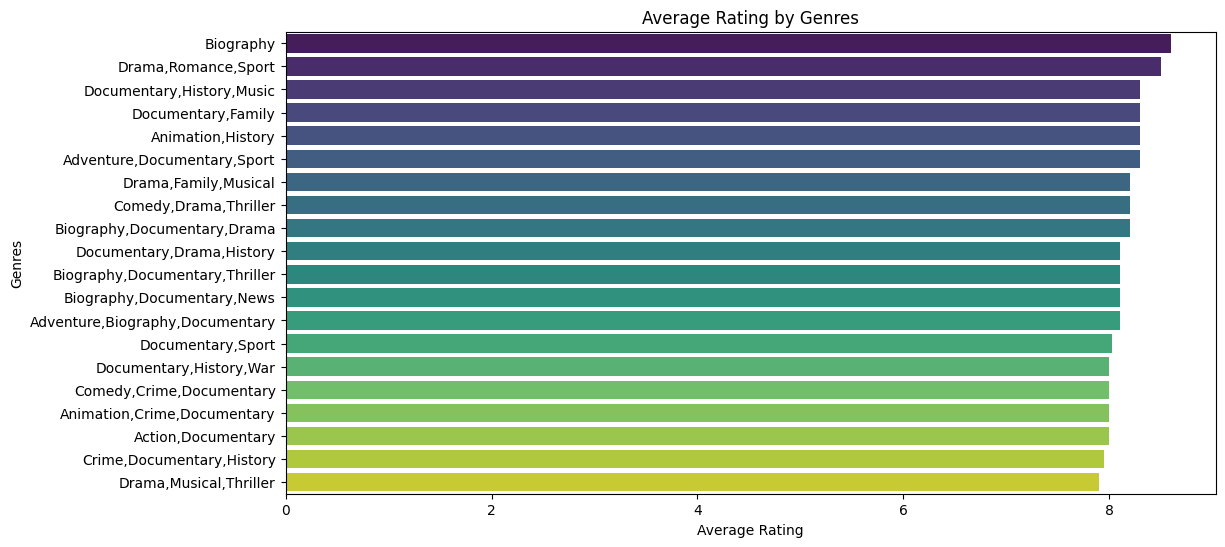

In [157]:

fourth_query = """
SELECT 
    mb.genres,
    AVG(mr.averagerating) AS avg_rating
FROM 
    movie_basics mb
INNER JOIN 
    movie_ratings mr ON mb.movie_id = mr.movie_id
WHERE 
    mr.numvotes >= 3523.6621669194105 AND mr.averagerating > 0
GROUP BY
    mb.genres
ORDER BY 
    avg_rating DESC
LIMIT 20
"""

# Load data into a pandas DataFrame
df = pd.read_sql_query(fourth_query, conn)

# Plot the relationship between genres and averagerating
plt.figure(figsize=(12, 6))
sns.barplot(x='avg_rating', y='genres', data=df, palette='viridis')
plt.title('Average Rating by Genres')
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.show()



#### 2.3.4 Let's analyse and see if there is a corelation between the running time of a movie and its average rating. 

Correlation between runtime_minutes and averagerating: -0.22880738510273765


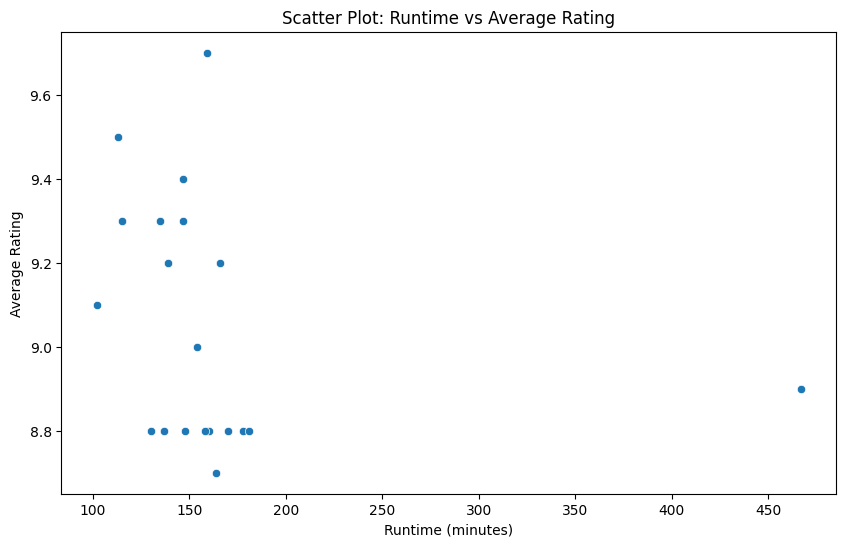

In [158]:
import seaborn as sns
# Load data into a pandas DataFrame
df = pd.read_sql_query(data_query, conn)

# Calculate correlation between 'runtime_minutes' and 'averagerating'
correlation = df['runtime_minutes'].corr(df['averagerating'])

# Print correlation coefficient
print(f"Correlation between runtime_minutes and averagerating: {correlation}")

# Draw a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='runtime_minutes', y='averagerating', data=df)
plt.title('Scatter Plot: Runtime vs Average Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
#Calculate and display the correlation coefficient
#correlation_coefficient = df['runtime_minutes'].corr(df['averagerating'])
#plt.text(0.5, 0.95, f'Correlation Coefficient: {correlation_coefficient:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.show()

### 2.4 Drawing Inferences from the database
#### 2.4.1 The following are some of the key observations that comes from the above analyses. 
- There is a week negative correlation between the runtime minutes of the movies and the rating they recieve.
- Biographies have the highest average rating over time. 
#### 2.4.2 The following are the recommendations to Microsoft based on these observations. 
- The running time of the movie shouldn't be a key point to consider when making movies. 
- Biographies could be considered as people generally rated them highly on average compared to other genres. 


## 3. Analysis of the CSV and SQL database together

### 3.1 Loading the database by joining them

In [159]:
from sqlalchemy import create_engine

# Replace 'your_database' and 'your_table' with the actual database and table names
table_name = 'bom'
df = cleaned_data

# Connect to the SQL database using SQLAlchemy
engine = create_engine('sqlite:///im.db')  # Replace with your actual database connection string

# Write the DataFrame to the SQL database
df.to_sql(table_name, engine, index=False, if_exists='replace')  # Change 'replace' to 'append' if needed

# Verify the data in the SQL table
sql_query = f'SELECT * FROM {table_name}'
df_from_sql = pd.read_sql(sql_query, engine)

# Display the DataFrame from SQL
df_from_sql


,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
2002,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06
2003,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05
2004,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05
2005,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,9.840000e+04


In [160]:
#joining the csv, movie basics and movie ratings columns
joined_query = """ 
SELECT mb.*, bom.*
FROM movie_basics mb
INNER JOIN bom
ON (mb.primary_title = bom.title OR mb.original_title = bom.title)
   AND mb.start_year = bom.year
INNER JOIN movie_ratings mr
ON mb.movie_id = mr.movie_id
WHERE numvotes>=3523.6621669194105 AND averagerating>6.5 AND domestic_gross >0 

LIMIT 100;
"""

### 3.2 Cleaning the database

In [161]:
pd.read_sql(joined_query, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year,total_gross
0,tt1210166,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Moneyball,Sony,75600000.0,34600000.0,2011,1.102000e+08
1,tt1229238,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller",Mission: Impossible - Ghost Protocol,Par.,209400000.0,485300000.0,2011,6.947000e+08
2,tt1232829,21 Jump Street,21 Jump Street,2012,109.0,"Action,Comedy,Crime",21 Jump Street,Sony,138400000.0,63100000.0,2012,2.015000e+08
3,tt1403981,Remember Me,Remember Me,2010,113.0,"Drama,Romance",Remember Me,Sum.,19100000.0,37000000.0,2010,5.610000e+07
4,tt1499658,Horrible Bosses,Horrible Bosses,2011,98.0,"Comedy,Crime",Horrible Bosses,WB (NL),117500000.0,92100000.0,2011,2.096000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
95,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",The Dark Knight Rises,WB,448100000.0,636800000.0,2012,1.084900e+09
96,tt1504320,The King's Speech,The King's Speech,2010,118.0,"Biography,Drama,History",The King's Speech,Wein.,135500000.0,275400000.0,2010,4.109000e+08
97,tt1508675,Le Havre,Le Havre,2011,93.0,"Comedy,Drama",Le Havre,Jan.,612000.0,9900000.0,2011,1.051200e+07
98,tt1542344,127 Hours,127 Hours,2010,94.0,"Adventure,Biography,Drama",127 Hours,FoxS,18300000.0,42400000.0,2010,6.070000e+07


## 3.3 Data Analysis

In [162]:

import seaborn as sns
from sqlalchemy import create_engine

# Connect to the SQLite database using SQLAlchemy
engine = create_engine('sqlite:///im.db')

# Execute the joined query
joined_query = """
    SELECT mb.*, bom.*, mr.averagerating
    FROM movie_basics mb
    INNER JOIN bom ON (mb.primary_title = bom.title OR mb.original_title = bom.title) AND mb.start_year = bom.year
    INNER JOIN movie_ratings mr ON mb.movie_id = mr.movie_id
    WHERE mr.numvotes >= 3523.6621669194105 AND mr.averagerating > 1 AND bom.domestic_gross > 0;
"""

sv = pd.read_sql(joined_query, engine)

#### Is there a correlation between the average ratings and the total gross income?

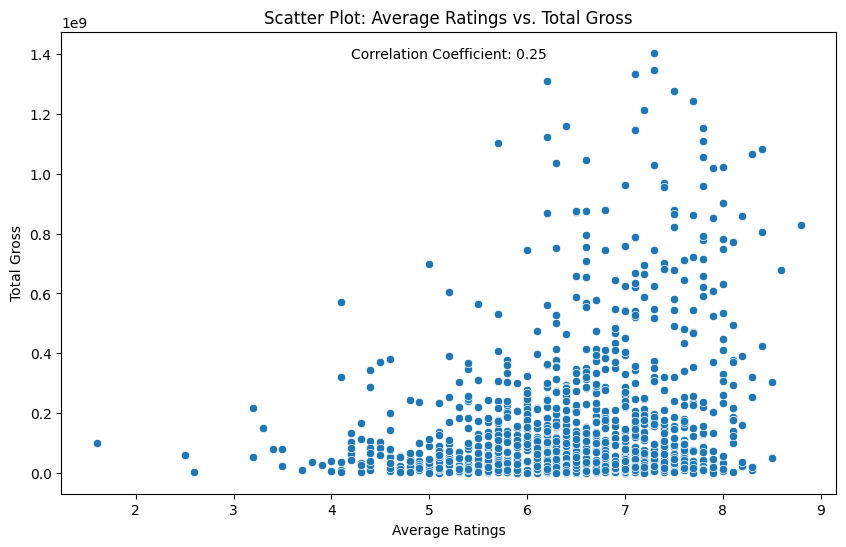

In [163]:
# Draw a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='averagerating', y='total_gross', data=sv)
plt.title('Scatter Plot: Average Ratings vs. Total Gross')
plt.xlabel('Average Ratings')
plt.ylabel('Total Gross')

# Calculate and display the correlation coefficient
correlation_coefficient = sv['averagerating'].corr(sv['total_gross'])
plt.text(0.5, 0.95, f'Correlation Coefficient: {correlation_coefficient:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.show()

While the correlation coefficient is positive, at 0.25, this shows that there is a weak correlation between the movie sets. Therefore, the company should not consider  that the average rating as an indication to predict the total gross, or vice versa.

### Which movies had the individual highest rating over the period of time? 

In [164]:
#find the particular movie that had the individual highest rating over the period of time
data_query= """
SELECT genres, runtime_minutes, start_year, averagerating, numvotes
FROM movie_basics mb
INNER JOIN movie_ratings mr
ON mb.movie_id = mr.movie_id
WHERE numvotes>=3523.6621669194105 AND averagerating> 5
ORDER BY averagerating DESC
LIMIT 20
"""
pd.read_sql(data_query,conn)

,genres,runtime_minutes,start_year,averagerating,numvotes
0,"Comedy,Drama",159.0,2019,9.7,5600
1,"Drama,History",113.0,2017,9.5,6509
2,Drama,147.0,2018,9.4,9629
3,"Action,Drama,War",135.0,2016,9.3,100568
4,"Crime,Mystery,Thriller",147.0,2016,9.3,18470
5,Drama,115.0,2014,9.3,17308
6,"Drama,Family",166.0,2016,9.2,4297
7,"Comedy,Documentary",139.0,2013,9.2,41560
8,Drama,102.0,2018,9.1,4162
9,Drama,154.0,2018,9.0,4854


From the table above, we can conclude that the top rated movie over the specified time period was a Comedy and Drama. However, this data refers to the single top rated film, and not the average rating over all the genres. This is particularly helpful if Microsoft would want to know the single movie that appealed to most. 

In [165]:
#Find the top directors for the top grossing movies. 
qr = """
    SELECT mb.movie_id, b.title as movie, b.total_gross, mb.genres as genre, p.primary_name as director, pw.primary_name as writer
    FROM movie_basics mb
    INNER JOIN bom b
        ON b.title = mb.primary_title OR b.title = mb.original_title
    INNER JOIN (
        SELECT DISTINCT movie_id, person_id FROM directors
    ) d
        ON d.movie_id = mb.movie_id
    INNER JOIN persons p
        ON d.person_id = p.person_id
    INNER JOIN (
        SELECT DISTINCT person_id, movie_id FROM writers
    ) w
        ON w.movie_id = mb.movie_id
    INNER JOIN persons pw
        ON pw.person_id = w.person_id
    WHERE total_gross > 0
    GROUP BY genre AND genre = 'biography'
    ORDER BY total_gross DESC
    LIMIT 100;
"""

pd.read_sql(qr, conn)

,movie_id,movie,total_gross,genre,director,writer
0,tt1636456,The Intern,194600000.0,None,Clara Picasso,Clara Picasso
1,tt10056334,Octubre,128800.0,Documentary,Ernest Vila,Ernest Vila


# Conclusion 

Here is the summary of the key recommendations:;
- The foreign market forms a key part of each studio's gross income. Therefore, Microsoft should ensure that the films produced appeal to a global audience. 
- For the past years, Biographies have had the highest rating. Therefore Microsoft should consider the genre when deciding on which film to produce.  
- Microsoft should not focus much on average movie ratings and indicators of the expected gross income. Instead, it should use the average ratings to know which genres the consumers would enjoy watching. 
- Microsoft could look for potential directors to add to their staff, depending on the genre they would want to start with, based on the table of directors for the top grossing films over the specified time period.  